In [124]:
%load_ext blackcellmagic
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [125]:
PROJECT_PATH = "D:/ProjectInterPromo/"

In [3]:
data: pd.DataFrame = pd.read_csv(PROJECT_PATH + "data\DONNEES_CONCAT_TLSE-LD/DATA1_COMPLET.csv")

C:\Users\Stior\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,01FEB2021,fìPÅæ,SECTEUR CENTRE,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,NaN,NaN,NaN,NaN,NaN,NaN,NF,0.0,Très peu actifs,toulouse
1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,01MAR2021,aLÄsb,SECTEUR EST,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,60.0,42.0,0.0,0.0,15.0,0.0,FI,1.0,Hyper actifs,toulouse
2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,01MAR2021,Z0ÎuP,SECTEUR SUD,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,7.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,toulouse
3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,01MAR2021,ëmzXM,SECTEUR NORD,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,6.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,toulouse
4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,01SEP2020,å3èJ3,SECTEUR CENTRE,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,41.0,13.0,0.0,0.0,9.0,0.0,FI,1.0,Hyper actifs,toulouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849341,835mBEOByTBamgQVgQg771KDA==,1,1,0,NaN,q9åmS,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,1.0,5.0,0.0,0.0,0.0,0.0,NF,1.0,Full digital,languedoc
849342,835rWBxack6OQY9AQFqyqJd5g==,1,1,0,NaN,6lçxa,SECTEUR MAUGUIO MEDITERRANEE,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,68.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc
849343,835F1MFghZuFjdn+sBHNuQaBw==,1,1,0,NaN,0késÎ,SECTEUR ALES CVN,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,1.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc
849344,835HAiChYU6Al85Ed4c5I/urw==,1,1,0,NaN,f3QRg,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,4.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc


In [4]:
def evaluation(pred: np.ndarray, y: np.ndarray, display=True):
    """[summary]

    Args:
        pred (np.ndarray): [description]
    """
    confusion_mat = confusion_matrix(y, pred)
    
    tn, fp, fn, tp = confusion_mat.ravel()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)
    
    if display:
        print("TN / FP \nFN / TP")
        print(confusion_mat)
        print(f"Precision : {precision}")
        print(f"Recall : {recall}")
        print(f"F1_Score : {f1_score}")
    
    return tn, fp, fn, tp

from sklearn.metrics import precision_recall_curve, auc

def evaluation2(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        print("TN / FP \nFN / TP")
        print(confusion_mat)
        print(f"Precision : {precision}")
        print(f"Recall : {recall}")
        print(f"F1_Score : {f1_score}")
        print(f"AUC : {value}")
    
    return value, f1_score, precision, recall

# value, f1_score, precision, recall = evaluation2(1/distances.mean(axis=1), np.array(data_quanti["TOP_FRAUDE"]))

In [80]:
evaluation(np.random.randint(0, 1, size=len(data)), data["TOP_FRAUDE"])

TN / FP 
FN / TP
[[847728      0]
 [  1618      0]]
Precision : nan
Recall : 0.0
F1_Score : nan


C:\Users\Stior\AppData\Local\Temp/ipykernel_7928/2630847544.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)


(847728, 0, 1618, 0)

In [8]:
pd.read_csv(PROJECT_PATH + "data/ECHANTILLONS/ECHANTILLON10/echantillon10.csv")

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
0,831KFcsZovqRwkmyqAJhBfPGA==,1,1,0,07JUL2020,SÎUVf,SECTEUR OUEST,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,-46.0,130.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Web,toulouse
1,835qrimyjXd7SPpng/cWuEz/w==,1,1,0,NaN,céyaÏ,SECTEUR ALES CVN,MAIL_OPTIN,TEL_OPTIN,POR_OPTOUT,...,7.0,6.0,0.0,0.0,0.0,0.0,QF,1.0,Full digital,languedoc
2,8353Z+loQUqfodVSdCZp3naCg==,1,0,1,NaN,tîêÅÊ,SECTEUR VALLEE DU RHONE,MAIL_OPTOUT,TEL_OPTIN,POR_OPTOUT,...,0.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Peu actifs Ma banque,languedoc
3,831rqXmvv7DhGKOKHAmM/3tGw==,1,0,1,15OCT2020,æËYJ3,SECTEUR OUEST,MAIL_OPTOUT,TEL_OPTIN,POR_OPTOUT,...,2.0,2.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Web modéré,toulouse
4,835M+SkL1tyzkjT6KCrMZlkNg==,1,0,1,NaN,céÎYG,SECTEUR BEZIERS,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,28.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,languedoc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84930,835Lc+970tiDoDBovevaK4LYA==,0,0,0,NaN,gíÇXN,SECTEUR MONTPELLIER PIC ST LOUP,MAIL_OPTIN,TEL_OPTOUT,POR_OPTIN,...,47.0,5.0,0.0,0.0,0.0,0.0,QF,1.0,Digital Web modéré,languedoc
84931,835a1IzTiIqW+DZI7N0vRVW5A==,0,0,0,NaN,çÊpÀu,SECTEUR NARBONNE,MAIL_NEUTRE,TEL_OPTIN,POR_OPTIN,...,6.0,6.0,0.0,0.0,0.0,0.0,QF,1.0,sans contact,languedoc
84932,835cKBDV4caS5EOVeLxdsRZLQ==,0,0,0,NaN,ïÎkhw,SECTEUR BEZIERS,MAIL_NEUTRE,TEL_OPTIN,POR_NEUTRE,...,8.0,8.0,0.0,0.0,0.0,0.0,FI,1.0,Très peu actifs,languedoc
84933,835CKVu+z3oofUX0nmQlmhgPw==,0,0,0,NaN,ÍlPFE,SECTEUR BEZIERS,MAIL_NEUTRE,TEL_OPTIN,POR_NEUTRE,...,6.0,6.0,0.0,0.0,0.0,0.0,NF,0.0,Très peu actifs,languedoc


In [3]:
data_v0 = pd.read_csv(PROJECT_PATH + "data\sortie\Données_v0\Donnees_V0_NAN_supprimes.csv")

In [7]:
data_v0.sample(1)

,Unnamed: 0,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
129685,170727,831h3YcU+Z1T4EO1OPouKwG1w==,0,0,0,å3èJ3,SECTEUR CENTRE,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,2.0,2.0,0.0,0.0,0.0,0.0,FI,1.0,Peu actifs Ma banque,toulouse


In [7]:
quali_col = []
count = 0
for i, name in zip(data_v0.dtypes, data_v0.columns):
    if i == "object":
        quali_col.append(name)

print(len(data_v0.dtypes))

257


In [8]:
data_quanti = data_v0.drop(columns=quali_col + ["Unnamed: 0"])

In [9]:
data_quanti = data_quanti.sample(100000)

In [9]:
from matplotlib import pyplot as plt
from sklearn import decomposition

In [10]:
pca=decomposition.PCA()
X_pca=pca.fit_transform(data_quanti.drop(columns=["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]))

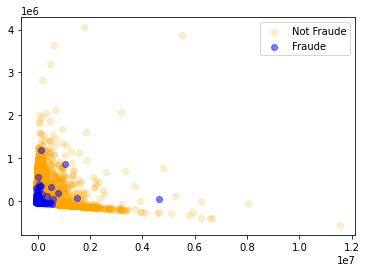

In [11]:
ax = [0, 1]
plt.scatter(X_pca[:,ax[0]][data_quanti["TOP_FRAUDE"]==0], X_pca[:,ax[1]][data_quanti["TOP_FRAUDE"]==0], alpha=0.2, c="orange", label="Not Fraude")
plt.scatter(X_pca[:,ax[0]][data_quanti["TOP_FRAUDE"]==1], X_pca[:,ax[1]][data_quanti["TOP_FRAUDE"]==1], alpha=0.5, c="b", label="Fraude")
plt.legend()
plt.show()

In [11]:
from sklearn.neighbors import NearestNeighbors

In [40]:
clf = NearestNeighbors(n_neighbors=20)
clf.fit(data_quanti.drop(columns=["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]))

NearestNeighbors(n_neighbors=20)

In [41]:
distances, indexes = clf.kneighbors(data_quanti.drop(columns=["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]))

In [42]:
dst = distances.mean(axis=1)
dst = (dst - dst.min()) / (dst.max() - dst.min())

In [43]:
print(np.unique(dst > 0.03, return_counts=True))
print(np.unique(data_quanti["TOP_FRAUDE"], return_counts=True))

(array([False,  True]), array([99556,   444], dtype=int64))
(array([0, 1], dtype=int64), array([99764,   236], dtype=int64))


In [81]:
evaluation(dst > 0.03, data_quanti["TOP_FRAUDE"])

TN / FP 
FN / TP
[[99322   442]
 [  234     2]]
Precision : 0.0045045045045045045
Recall : 0.00847457627118644
F1_Score : 0.00588235294117647


(99322, 442, 234, 2)

In [135]:
evaluation2(1/distances.mean(axis=1), data_quanti["TOP_FRAUDE"])

C:\Users\Stior\AppData\Local\Temp/ipykernel_7928/3131797713.py:28: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


(0.0018702726173582675,
 array([0.0047159 , 0.00469596, 0.00469601, ...,        nan,        nan,
        0.        ]),
 array([0.00236352, 0.00235353, 0.00235355, ..., 0.        , 0.        ,
        1.        ]),
 array([1.        , 0.99576271, 0.99576271, ..., 0.        , 0.        ,
        0.        ]))

In [125]:
value, f1_score, precision, recall = evaluation2(1/distances.mean(axis=1), np.array(data_quanti["TOP_FRAUDE"]))

C:\Users\Stior\AppData\Local\Temp/ipykernel_7928/3131797713.py:28: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


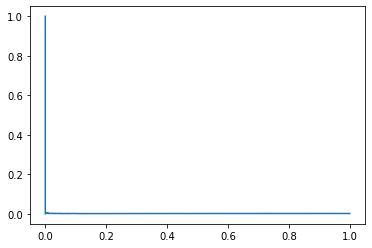

In [20]:
plt.plot(recall, precision)
plt.show()

0.0020454388224921682


C:\Users\Stior\AppData\Local\Temp/ipykernel_6160/3131797713.py:28: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


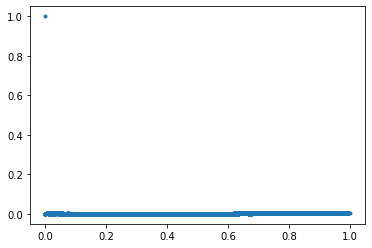

In [19]:
value, f1_score, precision, recall = evaluation2(np.random.rand(len(data_quanti)), data_quanti["TOP_FRAUDE"])
print(value)
plt.plot(recall, precision, ".")
plt.show()

In [16]:
thresholds

array([0.00509257, 0.00509519, 0.005105  , ..., 0.99997589, 0.99998813,
       0.9999999 ])

In [6]:
data_v0

,Unnamed: 0,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
0,1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,aLÄsb,SECTEUR EST,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,60.0,42.0,0.0,0.0,15.0,0.0,FI,1.0,Hyper actifs,toulouse
1,2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,Z0ÎuP,SECTEUR SUD,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,7.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,toulouse
2,3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,ëmzXM,SECTEUR NORD,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,6.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,toulouse
3,4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,å3èJ3,SECTEUR CENTRE,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,41.0,13.0,0.0,0.0,9.0,0.0,FI,1.0,Hyper actifs,toulouse
4,5,8316U9AkRrt1X0jnjjhpZ+BQg==,0,0,0,j9od0,SECTEUR EST,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,14.0,12.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,toulouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644343,849334,835BpVQQQHihSjU3xazUZuOsA==,0,0,0,phIË9,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTIN,...,44.0,1.0,0.0,0.0,0.0,0.0,NF,0.0,Digital Web modéré,languedoc
644344,849336,835IOkfve1trONOYLRgLUxvmw==,0,0,0,ïÎkhw,SECTEUR BEZIERS,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,7.0,36.0,0.0,0.0,0.0,0.0,NF,0.0,Digital Ma Banque,languedoc
644345,849340,8351PG816ln0/sIDd6IBfqnaA==,0,0,0,êO0èä,SECTEUR NIMES,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,1.0,39.0,0.0,0.0,0.0,0.0,NF,0.0,Digital Web modéré,languedoc
644346,849341,835mBEOByTBamgQVgQg771KDA==,1,1,0,q9åmS,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,1.0,5.0,0.0,0.0,0.0,0.0,NF,1.0,Full digital,languedoc


In [15]:
bool_col = []
for i in data_quanti.columns:
    unique_value = np.unique(data_quanti[i])
    
    if len(unique_value) == 2:
        if 1 in unique_value and 0 in unique_value:
            bool_col.append(i)

print(bool_col)

['TOP_FRAUDE', 'TOP_FRAUDE_CARTE', 'TOP_FRAUDE_VIREMENT', 'TOP_E_RELEVE', 'FIAB_TEL_DOMICILE', 'FIAB_TEL_TRAVAIL', 'FIAB_TEL_PORTABLE', 'FIAB_EMAIL', 'REFUS_SEA', 'NB_VEL_EPARGNE_6M', 'NB_DEPOSE_PREDICA_WEB_6M', 'NB_DEPOSE_PREDICA_AG_6M', 'NB_DEPOSE_PACIFICA_AG_6M', 'NB_DEPOSE_EPARGNE_WEB_6M', 'NB_DEPOSE_EPARGNE_MBQE_6M', 'NB_DEPOSE_EPARGNE_AG_6M', 'TOP_SECURIPASS', 'top_situ_particuliere', 'top_affecte', 'top_entretien_3M', 'top_entretien_6M', 'top_entretien_12M', 'top_CREDIT', 'top_REVOLVING', 'top_credit_CONSO', 'top_credit_HABITAT', 'top_produit_collecte', 'top_produit_monetaire_dispo', 'top_produit_monetaire_bloque', 'top_produit_emprunts', 'top_produit_epargne_logement', 'top_ouv_prod_6M', 'top_produit_Assurance', 'top_produit_Cartes', 'top_produit_Credit', 'top_produit_Epargne', 'top_produit_Services', 'Flag_bq_principale']


In [18]:
autre_col = set(data_quanti.columns) - set(bool_col)

In [20]:
len(autre_col), len(bool_col)

(193, 38)

In [3]:
data_clean = pd.read_csv(PROJECT_PATH + "data\Donnees_v1.csv")

In [22]:
bool_col = []
for i in data_clean.columns:
    unique_value = np.unique(data_clean[i])
    
    if len(unique_value) == 2:
        if 1 in unique_value and 0 in unique_value:
            bool_col.append(i)

print(bool_col)

['TOP_FRAUDE', 'TOP_FRAUDE_CARTE', 'TOP_FRAUDE_VIREMENT', 'TOP_E_RELEVE', 'MESSAGERIE_WEB_ACTIVE', 'FIAB_TEL_DOMICILE', 'FIAB_TEL_TRAVAIL', 'FIAB_TEL_PORTABLE', 'FIAB_EMAIL', 'REFUS_SEA', 'NB_VEL_EPARGNE_6M', 'NB_DEPOSE_PREDICA_WEB_6M', 'NB_DEPOSE_PREDICA_AG_6M', 'NB_DEPOSE_PACIFICA_AG_6M', 'NB_DEPOSE_EPARGNE_WEB_6M', 'NB_DEPOSE_EPARGNE_MBQE_6M', 'NB_DEPOSE_EPARGNE_AG_6M', 'TOP_SECURIPASS', 'top_situ_particuliere', 'top_affecte', 'top_entretien_3M', 'top_entretien_6M', 'top_entretien_12M', 'top_CREDIT', 'top_REVOLVING', 'top_credit_CONSO', 'top_credit_HABITAT', 'top_produit_collecte', 'top_produit_monetaire_dispo', 'top_produit_monetaire_bloque', 'top_produit_emprunts', 'top_produit_epargne_logement', 'top_real_pret_3M', 'top_real_pret_6M', 'top_pro', 'top_PDG', 'top_PRESIDENT', 'top_DIRECTEUR_GENERAL', 'top_GERANT', 'top_ADMINISTRATEUR', 'top_TRESORIER', 'top_COMMANDITAIRE', 'nouveau_societaire_M', 'perte_societaire_M', 'societaire_M', 'top_DAV', 'top_debiteur_M', 'top_ferm_prod_6M', 

In [68]:
autre_col = list(set(data_clean.columns) - set(bool_col))
len(autre_col), len(bool_col)

(203, 198)

In [79]:
i = 10
autre_col[20*i:20*(i + 1)]

['NBJ_CNT_AGENCE_RETRAIT_6M', 'nb_ferm_prod_6M', 'nb_commission_intervention']

In [53]:
data_clean

,Unnamed: 0,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,...,SECTEUR_GESTION_SECTEUR MONTPELLIER CENTRE UNIV,SECTEUR_GESTION_SECTEUR MONTPELLIER PIC ST LOUP,SECTEUR_GESTION_SECTEUR NARBONNE,SECTEUR_GESTION_SECTEUR NIMES,SECTEUR_GESTION_SECTEUR NORD,SECTEUR_GESTION_SECTEUR OUEST,SECTEUR_GESTION_SECTEUR SUD,SECTEUR_GESTION_SECTEUR THAU LITTORAL,SECTEUR_GESTION_SECTEUR VALLEE DU RHONE,SECTEUR_GESTION_SVCES SIEGES BR RESEAUX
0,0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
3,3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849407,849407,835mBEOByTBamgQVgQg771KDA==,1,1,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
849408,849408,835rWBxack6OQY9AQFqyqJd5g==,1,1,0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
849409,849409,835F1MFghZuFjdn+sBHNuQaBw==,1,1,0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
849410,849410,835HAiChYU6Al85Ed4c5I/urw==,1,1,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Lecture du fichier de donnée
print("Nombre de fraude :", sum(data_clean2["TOP_FRAUDE"]))
print("Nombre de données : ", len(data_clean2))
print("Ratio : ", sum(data_clean2["TOP_FRAUDE"]) / len(data_clean2) * 100)

ech_test = data_clean2.sample(int(len(data_clean2) * 0.10), random_state=1)
ech_train = data_clean2.drop(ech_test.index)

print("------------ Sur un echantillion test ------------")
print("Nombre de fraude :", sum(ech_test["TOP_FRAUDE"]))
print("Nombre de données : ", len(ech_test))
print("Ratio : ", sum(ech_test["TOP_FRAUDE"]) / len(ech_test) * 100)

print("------------ Sur un echantillion train ------------")
print("Nombre de fraude :", sum(ech_train["TOP_FRAUDE"]))
print("Nombre de données : ", len(ech_train))
print("Ratio : ", sum(ech_train["TOP_FRAUDE"]) / len(ech_train) * 100)

Nombre de fraude : 1630
Nombre de données :  849412
Ratio :  0.19189745376801834
------------ Sur un echantillion test ------------
Nombre de fraude : 169
Nombre de données :  84941
Ratio :  0.19896163219175664
------------ Sur un echantillion train ------------
Nombre de fraude : 1461
Nombre de données :  764471
Ratio :  0.19111254710773856


In [4]:
ech_train.to_csv(PROJECT_PATH + "data/donnee_v2_ech_train.csv", index=False)
ech_test.to_csv(PROJECT_PATH + "data/donnee_v2_ech_test.csv", index=False)

NameError: name 'ech_train' is not defined

In [89]:
data_clean - data_clean.mean()

In [88]:
ech_test["id"]

KeyError: 'id'

In [6]:
quali_col = []
count = 0
for i, name in zip(data_clean.dtypes, data_clean.columns):
    if i == "object":
        quali_col.append(name)

print(len(data_clean.dtypes))

401


In [7]:
quali_col

['ID', 'TAUX_LECTURE_PAP_6M', 'TAUX_LECTURE_EMAIL_6M', 'TAUX_LECTURE_MS_6M']

In [8]:
ech = data_clean.sample(10000)

In [6]:
for i in data_clean.drop(columns=["Unnamed: 0", 'ID', 'TAUX_LECTURE_PAP_6M', 'TAUX_LECTURE_EMAIL_6M', 'TAUX_LECTURE_MS_6M']):
    data_clean[i].mean()
    break

In [3]:
data_clean2 = pd.read_csv(PROJECT_PATH + "data\Donnees_v2.csv").drop(columns="Unnamed: 0")

In [4]:
data_clean2.head()

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,...,SECTEUR_GESTION_SECTEUR MONTPELLIER CENTRE UNIV,SECTEUR_GESTION_SECTEUR MONTPELLIER PIC ST LOUP,SECTEUR_GESTION_SECTEUR NARBONNE,SECTEUR_GESTION_SECTEUR NIMES,SECTEUR_GESTION_SECTEUR NORD,SECTEUR_GESTION_SECTEUR OUEST,SECTEUR_GESTION_SECTEUR SUD,SECTEUR_GESTION_SECTEUR THAU LITTORAL,SECTEUR_GESTION_SECTEUR VALLEE DU RHONE,SECTEUR_GESTION_SVCES SIEGES BR RESEAUX
0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
(data_clean2.drop(columns=["ID", "TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]) - data_clean2.drop(columns=["ID", "TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]).mean()) / data_clean2.drop(columns=["ID", "TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]).std()

,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,NBJ_CNT_AGENCE_DEPOT_6M,NBJ_CNT_AGENCE_VENTE_6M,NBJ_CNT_RDV_AGENCE_6M,...,SECTEUR_GESTION_SECTEUR MONTPELLIER CENTRE UNIV,SECTEUR_GESTION_SECTEUR MONTPELLIER PIC ST LOUP,SECTEUR_GESTION_SECTEUR NARBONNE,SECTEUR_GESTION_SECTEUR NIMES,SECTEUR_GESTION_SECTEUR NORD,SECTEUR_GESTION_SECTEUR OUEST,SECTEUR_GESTION_SECTEUR SUD,SECTEUR_GESTION_SECTEUR THAU LITTORAL,SECTEUR_GESTION_SECTEUR VALLEE DU RHONE,SECTEUR_GESTION_SVCES SIEGES BR RESEAUX
0,-0.989194,-1.389701,-0.916199,-0.183181,0.403513,-0.849826,-0.081069,-0.394120,-0.306605,-0.302913,...,-0.241526,-0.209404,-0.243346,-0.237259,-0.254846,-0.252535,-0.256703,-0.232499,-0.205601,-0.034827
1,1.010923,0.719578,1.091464,-0.183181,0.403513,1.176710,-0.081069,-0.394120,-0.306605,-0.302913,...,-0.241526,-0.209404,-0.243346,-0.237259,-0.254846,-0.252535,-0.256703,-0.232499,-0.205601,-0.034827
2,1.010923,0.719578,-0.916199,-0.183181,0.403513,1.176710,-0.081069,-0.394120,-0.306605,-0.302913,...,-0.241526,-0.209404,-0.243346,-0.237259,-0.254846,-0.252535,3.895543,-0.232499,-0.205601,-0.034827
3,1.010923,0.719578,-0.916199,-0.183181,0.403513,-0.849826,-0.081069,-0.394120,-0.306605,1.328124,...,-0.241526,-0.209404,-0.243346,-0.237259,3.923935,-0.252535,-0.256703,-0.232499,-0.205601,-0.034827
4,1.010923,0.719578,-0.916199,-0.183181,0.403513,1.176710,-0.081069,0.045043,-0.306605,-0.302913,...,-0.241526,-0.209404,-0.243346,-0.237259,-0.254846,-0.252535,-0.256703,-0.232499,-0.205601,-0.034827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849407,1.010923,0.719578,-0.916199,-0.183181,0.403513,1.176710,-0.081069,-0.394120,2.181109,1.328124,...,-0.241526,-0.209404,-0.243346,-0.237259,-0.254846,-0.252535,-0.256703,-0.232499,-0.205601,-0.034827
849408,1.010923,0.719578,1.091464,-0.183181,0.403513,1.176710,-0.081069,-0.394120,-0.306605,-0.302913,...,-0.241526,-0.209404,-0.243346,-0.237259,-0.254846,-0.252535,-0.256703,-0.232499,-0.205601,-0.034827
849409,-0.989194,0.719578,-0.916199,-0.183181,0.403513,-0.849826,-0.081069,0.923369,7.156537,6.221233,...,-0.241526,-0.209404,-0.243346,-0.237259,-0.254846,-0.252535,-0.256703,-0.232499,-0.205601,-0.034827
849410,1.010923,0.719578,-0.916199,-0.183181,0.403513,1.176710,-0.081069,-0.394120,2.181109,-0.302913,...,-0.241526,-0.209404,-0.243346,-0.237259,-0.254846,-0.252535,-0.256703,-0.232499,-0.205601,-0.034827


In [39]:
data_clean2 = pd.read_csv(PROJECT_PATH + "data\Donnees_v2.csv").drop(columns="Unnamed: 0")

bool_col = []
for i in data_clean2.columns:
    unique_value = np.unique(data_clean2[i])
    
    if len(unique_value) == 2:
        if 1 in unique_value and 0 in unique_value:
            bool_col.append(i)

y_col = ["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]

autre_col = list(set(data_clean2.columns) - set(bool_col + y_col + ["ID"]))

sub_df = data_clean2[autre_col]

data_clean2[autre_col] = ((sub_df - sub_df.mean()) / sub_df.std())

In [ ]:
data_clean2

# Transformation

In [126]:
ech_train = pd.read_csv(PROJECT_PATH + "data/donnee_v2_ech_train.csv")
ech_test = pd.read_csv(PROJECT_PATH + "data/donnee_v2_ech_test.csv")

In [127]:
def bool_other_col(data: pd.DataFrame):
    bool_col = []
    for i in data.columns:
        unique_value = np.unique(data[i])

        if len(unique_value) == 2:
            if 1 in unique_value and 0 in unique_value:
                bool_col.append(i)

    autre_col = list(set(data.columns) - set(bool_col))
    return autre_col, bool_col

In [128]:
def puissance_10(X: pd.Series):
    return np.unique(np.floor(np.log10(X + 1)), return_counts=True)


def var_neg(colonne):
    for elem in colonne:
        if elem < 0:
            return True
    return False


def var_neg_affichage(colonne):
    listePos = []
    listeNeg = []
    for elem in colonne:
        if elem < 0:
            listeNeg.append(elem)
            listePos.append(0)
        else:
            listePos.append(elem)
            listeNeg.append(0)
    return listePos, listeNeg


def zeros(col, seuil):
    return (col == 0).sum() / len(col) >= seuil


def replaceNonZero(val):
    if val != 0:
        val = 1
    return val


# df[col] = df[col].apply(replaceNonZero)

In [20]:
print(puissance_10(np.array([10, 15, 1552, 15521552, 15521552, 15521552, 15521552, 15521552, 15521552, 1552155215521552])))
print(var_neg([-1, -44, 55]))

(array([ 1.,  3.,  7., 15.]), array([2, 1, 6, 1], dtype=int64))
True


In [140]:
from tqdm.notebook import tqdm

def transformation_pos(col):
    # Si taux 0 >> 0.9
    if zeros(col, 0.9):
        # Return bool
        return np.array([i if i == 0 else 1 for i in col])

    # Sinon
    else:
        power = puissance_10(col)[0]

        # Application log si valeur grande, ou plus de 3 ordre différent
        if max(power) > 6 or len(power) > 2:
            return np.log(col)

        # Peu d'ordre de grandeur application d'une sqrt
        elif max(power) > 0:
            return np.sqrt(col)
        
        return col


def transformation(df: pd.DataFrame):
    df2 = df.copy()
    autre_col, bool_col = bool_other_col(df)

    for col in tqdm(autre_col, total=len(autre_col)):
        if col in ["ID", "TOP_FRAUDE", "TOP_FRAUDE_VIREMENT", "TOP_FRAUDE_CARTE"]:
            pass
        else:
            if var_neg(df[col]):
                pos, neg = var_neg_affichage(df[col])
                if len(pos) == 0:
                    df2[col] = transformation_pos(- np.array(neg))

                else:
                    df2[col + "_neg"] = [i if i == 0 else 1 for i in -np.array(neg)]
                    df2[col + "_pos"] = transformation_pos(np.array(pos))

            else:
                df2[col] = transformation_pos(df[col])

    return df2


transfo = transformation(ech_train)

  0%|          | 0/202 [00:00<?, ?it/s]

C:\Users\Stior\AppData\Local\Temp/ipykernel_13924/811546934.py:15: RuntimeWarning: divide by zero encountered in log
  return np.log(col)
C:\Users\Stior\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [141]:
transfo

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,...,mt_interet_debiteur_neg,mt_interet_debiteur_pos,mt_factu_ttc_M6_neg,mt_factu_ttc_M6_pos,MONETAIRE_DISPONIBLE_M6_neg,MONETAIRE_DISPONIBLE_M6_pos,EMPRUNTS_ECART_M6_neg,EMPRUNTS_ECART_M6_pos,MONETAIRE_DISPONIBLE_neg,MONETAIRE_DISPONIBLE_pos
0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.0,-inf,-0.0,-inf,-0.0,-inf,-0.0,0.0,-0.0,-inf
1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,...,-0.0,2.197225,-0.0,3.737670,-0.0,4.025352,-0.0,0.0,-0.0,4.025352
2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,...,-0.0,-inf,-0.0,1.791759,-0.0,7.170120,-0.0,0.0,-0.0,7.170120
3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,...,-0.0,-inf,-0.0,1.791759,-0.0,6.152733,-0.0,0.0,-0.0,7.495542
4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,...,-0.0,0.000000,-0.0,2.564949,-0.0,9.433484,-0.0,0.0,-0.0,9.642123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764466,8351PG816ln0/sIDd6IBfqnaA==,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,...,-0.0,-inf,-0.0,3.663562,-0.0,-inf,-0.0,0.0,-0.0,-inf
764467,835mBEOByTBamgQVgQg771KDA==,1,1,0,1.0,1.0,0.0,0.0,1.0,1.0,...,-0.0,-inf,-0.0,1.609438,-0.0,-inf,-0.0,0.0,-0.0,5.736572
764468,835rWBxack6OQY9AQFqyqJd5g==,1,1,0,1.0,1.0,1.0,0.0,1.0,1.0,...,-0.0,-inf,-0.0,-inf,-0.0,-inf,-0.0,0.0,-0.0,-inf
764469,835F1MFghZuFjdn+sBHNuQaBw==,1,1,0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.0,-inf,-0.0,-inf,-0.0,-inf,-0.0,0.0,-0.0,8.294050


In [139]:
autre_col, bool_col = bool_other_col(ech_train)
neg_var = []
count = 0
for col in autre_col:
    try:
        if var_neg(ech_train[col]):
            count += 1
            neg_var.append(col)
    except:
        print(col)
count

ID


21

In [122]:
i = 6
val, occur = np.unique(ech_train[neg_var[i]][ech_train[neg_var[i]] != 0], return_counts=True)
val, occur = list(zip(*sorted(zip(val, occur), key=lambda x: x[0])))

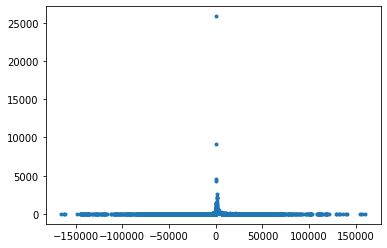

In [123]:
plt.plot(val, occur, ".")

In [113]:
np.min(np.abs(val))

1.0

In [55]:
for i in neg_var:
    print(i)

mt_factu_ttc_M
SURFACE_FINANCIERE
MONETAIRE_BLOQUE_ECART_M6
ENCOURS_DAV_ECART_M6
MONETAIRE_BLOQUE
SURFACE_FINANCIERE_M6
EPARGNE_LOGEMENT_ECART_M6
mt_reduc_ttc_M6
mt_paiement_carte_M6
SURFACE_FINANCIERE_ECART_M6
mt_reduc_ttc_M
MONETAIRE_DISPONIBLE_ECART_M6
MONETAIRE_BLOQUE_M6
mt_paiement_chq_M6
mt_paiement_carte_M
mt_paiement_chq_M
mt_interet_debiteur
mt_factu_ttc_M6
MONETAIRE_DISPONIBLE_M6
EMPRUNTS_ECART_M6
MONETAIRE_DISPONIBLE
